In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt

In [3]:
country=pd.read_csv("C:\who_suicide_statistics.csv")
country

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


In [4]:
country.dropna(axis=0,inplace =True)
country.isnull().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

In [5]:
Dub = country.duplicated()
np.unique(Dub)

array([False], dtype=bool)

In [6]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
country.sex = le.fit_transform(country.sex) # female:0 , male:1
country.age = le.fit_transform(country.age) # 15-24: 0, 25-34:1, 35-54:2 , 5-14:3, 55-74:4, 75+:5

country.head()

,country,year,sex,age,suicides_no,population
24,Albania,1987,0,0,14.0,289700.0
25,Albania,1987,0,1,4.0,257200.0
26,Albania,1987,0,2,6.0,278800.0
27,Albania,1987,0,3,0.0,311000.0
28,Albania,1987,0,4,0.0,144600.0


In [7]:
bins = [3, 0, 1, 2, 4, 5]
n = len(bins)
agedata = [country[country['age']==bins[i]]['suicides_no'].values.sum() for i in range(n)]

Age_df = pd.DataFrame(agedata)
Age_df.index = ('5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years')
Age_df.columns = ['Sum of suicides_no']
Age_df

,Sum of suicides_no
5-14 years,62320.0
15-24 years,975700.0
25-34 years,1360780.0
35-54 years,2887740.0
55-74 years,1955150.0
75+ years,756777.0


In [8]:
Age_df.max()

Sum of suicides_no    2887740.0
dtype: float64

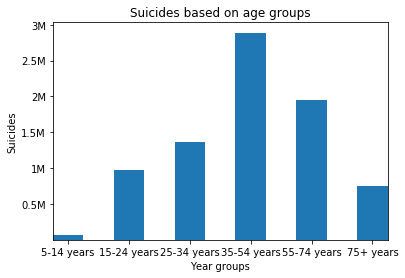

In [9]:
n = np.arange(6)
plt.bar(n, Age_df['Sum of suicides_no'] , 0.5)

plt.ylabel('Suicides')
plt.xlabel('Year groups')
plt.xticks(n, Age_df.index)
plt.title('Suicides based on age groups')
plt.yticks([500000,1000000,1500000,2000000,2500000,3000000],
           ['0.5M','1M','1.5M','2M','2.5M','3M'])
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

In [10]:
bins = [3, 0, 1, 2, 4, 5]
n = len(bins)
Female = country[country['sex']==0]
femaledata = [Female[Female['age']==bins[i]]['suicides_no'].values.sum() for i in range(n)]

Male = country[country['sex']==1]
maledata = [Male[Male['age']==bins[i]]['suicides_no'].values.sum() for i in range(n)]

In [11]:
Female_df = pd.DataFrame(femaledata)
Female_df.index = ('5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years')
Female_df.columns = ['Sum of female suicides_no']

Male_df = pd.DataFrame(maledata)
Male_df.index = Female_df.index
Male_df.columns = ['Sum of male suicides_no']

Sex_concat = pd.concat([Male_df, Female_df], axis = 1)
Sex_concat

,Sum of male suicides_no,Sum of female suicides_no
5-14 years,42168.0,20152.0
15-24 years,757391.0,218309.0
25-34 years,1104353.0,256427.0
35-54 years,2280320.0,607420.0
55-74 years,1426791.0,528359.0
75+ years,493150.0,263627.0


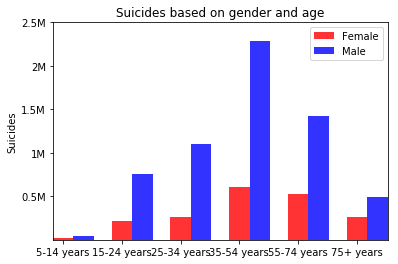

In [12]:
fig, ax = plt.subplots()
n = np.arange(6)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(n, Female_df['Sum of female suicides_no'], bar_width,
                 alpha=opacity,
                 color='red',
                 label='Female')
 
rects2 = plt.bar(n + bar_width, Male_df['Sum of male suicides_no'], bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Male')

ax.set_ylabel('Suicides')
ax.set_title('Suicides based on gender and age')
ax.set_xticks(n)
ax.set_xticklabels(Sex_concat.index)
plt.yticks([500000,1000000,1500000,2000000,2500000],
              ['0.5M','1M','1.5M','2M','2.5M'])
plt.autoscale(enable=True, axis='x', tight=True)
ax.legend()
plt.show()

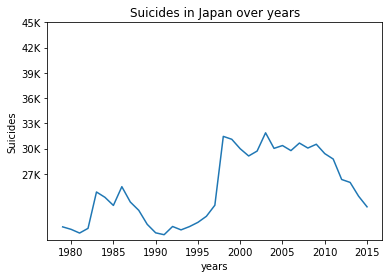

In [20]:
Japan = country[country['country']=='Japan']
years = np.unique(Japan.year)

a = []
dict = {}
for i in years:
    sum = Japan[Japan['year']==i]['suicides_no'].values.sum()
    dict[i] = sum 
a.append(dict)

Japanyear_df = pd.DataFrame(a)
Japanyear_df = np.transpose(Japanyear_df)
Japanyear_df.columns = ['Suicides'] 

plt.plot(Japanyear_df)
plt.title('Suicides in Japan over years')
plt.xlabel('years')
plt.ylabel('Suicides')
plt.yticks([27000,30000,33000,36000,39000,42000,45000],
           ['27K','30K','33K','36K','39K','42K','45K'])
plt.show()

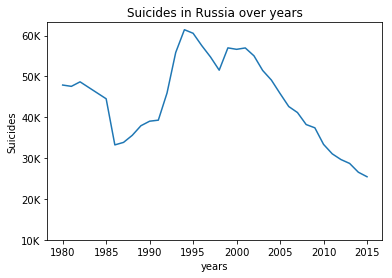

In [14]:
RUSSIA = country[country['country']=='Russian Federation']
years = np.unique(RUSSIA.year)

a = []
dict = {}
for i in years:
    sum = RUSSIA[RUSSIA['year']==i]['suicides_no'].values.sum()
    dict[i] = sum 
a.append(dict)
RUSyear_df = pd.DataFrame(a)
RUSyear_df = np.transpose(RUSyear_df)
RUSyear_df.columns = ['Suicides'] 

plt.plot(RUSyear_df)
plt.title('Suicides in Russia over years')
plt.xlabel('years')
plt.ylabel('Suicides')
plt.yticks([10000,20000,30000,40000,50000,60000],
           ['10K','20K','30K','40K','50K','60K'])
plt.show()

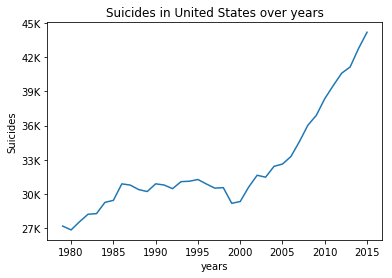

In [21]:
US = country[country['country']=='United States of America']
years = np.unique(US.year)

a = []
dict = {}
for i in years:
    sum = US[US['year']==i]['suicides_no'].values.sum()
    dict[i] = sum 
a.append(dict)

USyear_df = pd.DataFrame(a)
USyear_df = np.transpose(USyear_df)
USyear_df.columns = ['Suicides'] 

plt.plot(USyear_df)
plt.title('Suicides in United States over years')
plt.xlabel('years')
plt.ylabel('Suicides')
plt.yticks([27000,30000,33000,36000,39000,42000,45000],
           ['27K','30K','33K','36K','39K','42K','45K'])
plt.show()

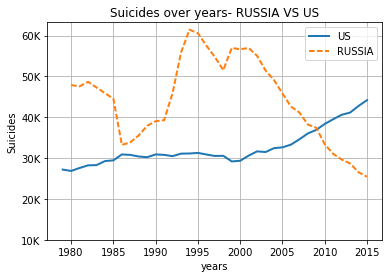

In [15]:
plt.plot(USyear_df , ls = '-', lw = 2)
plt.plot(RUSyear_df , ls = '--', lw = 2)
plt.title('Suicides over years- RUSSIA VS US')
plt.xlabel('years')
plt.ylabel('Suicides')
plt.yticks([10000,20000,30000,40000,50000,60000],
           ['10K','20K','30K','40K','50K','60K'])
plt.legend(['US','RUSSIA'] , loc ='best')
plt.grid()
plt.show()

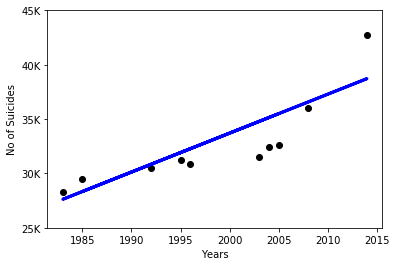

In [22]:
# Linear regression for US
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Use only one feature: year
US_data = US.values
year = US_data[:,1]
x = np.unique(year).reshape(-1,1)
y = USyear_df.Suicides.values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.25, random_state=42)
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Years')
plt.ylabel('No of Suicides')
plt.yticks([25000,30000,35000,40000,45000],['25K','30K','35K','40K','45K'])
plt.show()

In [23]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 357.98641875]
Variance score: 0.69
